In [12]:
import math
readinput = [0, math.pi / 6, math.pi * 2 / 6, math.pi * 3 / 6]
x_in = math.pi / 4
print(readinput)

[0, 0.5235987755982988, 1.0471975511965976, 1.5707963267948966]


In [13]:
def lag(xin, readinput):
    a = []
    for number in range(len(readinput)):
        sum = 1
        for i in range(len(readinput)):
            if (i != number):
                sum *= (xin - readinput[i]) / (readinput[number] - readinput[i])   
        a.append(math.cos(readinput[number]) * sum)
    sum = 0
    for number in range(len(a)):
        sum += a[number]
    return sum

In [14]:
z = []
print("Значение в изначально заданной точке (по Лагранжу) (x = ", x_in, ") = ", lag(x_in, readinput), sep ='')

Значение в изначально заданной точке (по Лагранжу) (x = 0.7853981633974483) = 0.7058892896287468


In [15]:
x_cos = []
y_cos = []

In [16]:
x_lag = []
y_lag = []
for num in range(900):
    x_cos.append(-3 + num * 0.01)
    y_cos.append(math.cos(-3 + num*0.01))
    x_lag.append(-3 +num * 0.01)
    y_lag.append(lag(-3 + num * 0.01, readinput))

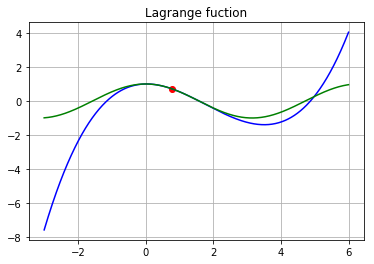

In [17]:
import matplotlib.pyplot as plt
plt.title('Lagrange fuction')
plt.grid(True)
plt.scatter(math.pi / 4, lag(x_in, readinput), color='red')
plt.plot(x_lag, y_lag, color='blue')
plt.plot(x_cos, y_cos, color='green')
plt.show()

In [18]:
#Теперь Ньютон
f_of = []
def make_f_of():
    for i in range(len(readinput)):
        f_of.append([])
    for i in range(len(readinput)):
        f_of[i].append(math.cos(readinput[i]))
    for j in range(1, len(readinput)):
        for i in range(len(readinput)):
            if (i <= len(readinput) - j - 1):
                f_of[i].append((f_of[i + 1][j - 1] - f_of[i][j - 1]) / (readinput[i + j] - readinput[i]))

In [19]:
def newton(f_of, xin, readinput):
    proizv = 1
    sum = 0
    for i in range(len(f_of[0])):
        if (i != 0):
            proizv *= xin - readinput[i - 1]
        sum += f_of[0][i] * proizv
    return sum

In [20]:
make_f_of()
print("Значение в изначально заданной точке (по Ньютону) (x = ", x_in, ") = ", newton(f_of, x_in, readinput), sep ='')

Значение в изначально заданной точке (по Ньютону) (x = 0.7853981633974483) = 0.7058892896287468


In [21]:
x_newton = []
y_newton = []
for num in range(900):
    x_newton.append(-3 + num * 0.01)
    y_newton.append(newton(f_of, -3 + num * 0.01, readinput))

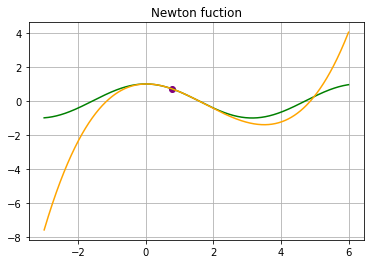

In [22]:
plt.title('Newton fuction')
plt.grid(True)
plt.scatter(math.pi / 4, newton(f_of, x_in, readinput), color='purple')
plt.plot(x_cos, y_cos, color='green')
plt.plot(x_newton, y_newton, color='orange')
plt.show()